In [1]:
import pandas as pd

In [2]:
option = pd.read_csv('option_train.csv')

In [3]:
option.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420,0.341270,0.03013,Under
1,0.125000,427.015526,465,0.166667,0.03126,Over
2,20.691244,427.762336,415,0.265873,0.03116,Under
3,1.035002,451.711658,460,0.063492,0.02972,Over
4,39.553020,446.718974,410,0.166667,0.02962,Under


I'll be looking at just the regression problem, so I'm going to take the Black Scholes column out.

In [4]:
option = option.iloc[:, :-1]

In [5]:
option.head()

,Value,S,K,tau,r
0,21.670404,431.623898,420,0.341270,0.03013
1,0.125000,427.015526,465,0.166667,0.03126
2,20.691244,427.762336,415,0.265873,0.03116
3,1.035002,451.711658,460,0.063492,0.02972
4,39.553020,446.718974,410,0.166667,0.02962


## Feature Creation

In [6]:
eng = option.copy()
eng['Potential'] = (eng['K'] - eng['S'])*eng['tau']

In [7]:
eng['NPV'] = eng['S'] / (1 + eng['r'])**(eng['tau'])

In [8]:
colList = eng.iloc[:, 1:].columns
for col1 in colList:
    for col2 in colList:
        if col1 != col2:
            eng[f'{col1}_{col2}_quotient'] = eng[col1]/eng[col2]

In [9]:
eng

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,Potential_S_quotient,Potential_K_quotient,Potential_tau_quotient,Potential_r_quotient,Potential_NPV_quotient,NPV_S_quotient,NPV_K_quotient,NPV_tau_quotient,NPV_r_quotient,NPV_Potential_quotient
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,-0.009191,-0.009445,-11.623898,-131.659008,-0.009284,0.989921,1.017318,1252.010324,14180.994494,-107.710020
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,0.014826,0.013615,37.984474,202.519056,0.014902,0.994883,0.913614,2548.982692,13590.225513,67.105910
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,-0.007932,-0.008176,-12.762336,-108.894765,-0.007997,0.991875,1.022378,1595.824917,13616.392290,-125.041753
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,0.001165,0.001144,8.288342,17.706728,0.001167,0.998142,0.980158,7101.241714,15170.675851,856.774677
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,-0.013700,-0.014926,-36.718974,-206.611380,-0.013766,0.995147,1.084271,2667.305870,15008.473302,-72.641078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,0.018856,0.017641,30.602837,276.181546,0.019010,0.991850,0.927948,1609.787412,14527.855139,52.602556
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,-0.019572,-0.020930,-28.453825,-288.738638,-0.019745,0.991206,1.059996,1441.036156,14623.089043,-50.644725
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,-0.015165,-0.016644,-38.042219,-203.617661,-0.015247,0.994659,1.091683,2495.129406,13354.962641,-65.588430
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,0.027366,0.025033,40.918797,405.666352,0.027601,0.991465,0.906945,1482.487579,14697.287461,36.229989


In [36]:
high_corrs_df = eng

In [37]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,Potential_NPV_quotient,NPV_S_quotient,NPV_K_quotient,NPV_tau_quotient,NPV_r_quotient,NPV_Potential_quotient,Anthony Feature 1,Anthony Feature 2,Anthony Feature 3,Anthony Feature 4
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,-0.009284,0.989921,1.017318,1252.010324,14180.994494,-107.710020,4.086408,0.123295,0.317331,0.353946
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,0.014902,0.994883,0.913614,2548.982692,13590.225513,67.105910,6.528645,0.026306,3.236924,2.301947
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,-0.007997,0.991875,1.022378,1595.824917,13616.392290,-125.041753,3.498892,0.075133,0.386561,0.436351
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,0.001167,0.998142,0.980158,7101.241714,15170.675851,856.774677,0.541884,0.004076,0.150702,0.140131
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,-0.013766,0.995147,1.084271,2667.305870,15008.473302,-72.641078,6.301098,0.031162,3.149480,4.438549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,0.019010,0.991850,0.927948,1609.787412,14527.855139,52.602556,8.633578,0.072270,2.038030,1.561426
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,-0.019745,0.991206,1.059996,1441.036156,14623.089043,-50.644725,8.836349,0.100158,1.909176,2.496928
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,-0.015247,0.994659,1.091683,2495.129406,13354.962641,-65.588430,6.698275,0.032975,3.540783,5.137920
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,0.027601,0.991465,0.906945,1482.487579,14697.287461,36.229989,12.371746,0.081216,3.645936,2.552839


In [38]:
import numpy as np
import statsmodels.formula.api as smf
feature_data = option.copy()


#some scaling ALL USELESS.
# feature_data['K_std'] = (feature_data['K']-feature_data['K'].mean())/feature_data['K'].std()
# feature_data['K_norm'] = (feature_data['K']-feature_data['K'].min())/(feature_data['K'].max()-feature_data['K'].min())
# feature_data['S_std'] = (feature_data['S']-feature_data['S'].mean())/feature_data['S'].std()
# feature_data['S_norm'] = (feature_data['S']-feature_data['S'].min())/(feature_data['S'].max()-feature_data['S'].min())

#It turns out, an option being in/out of the money has little to do with its value. (0.57 p value)
feature_data['Money_Ind'] = np.where(feature_data['S'].values < feature_data['K'], 'OTM', 'ITM')
feature_data['ITM?'] = np.where(feature_data['Money_Ind'] == 'ITM', 1, 0)

#One feature, abs(s-k)/(1/tau)
#turns out to be a really good feature...
feature_data['Feature_1'] = abs(feature_data['S']-feature_data['K'])*feature_data['tau']*(1+feature_data['r'])

#shitty feature
feature_data['Feature_2'] = feature_data['S']/feature_data['K']*feature_data['tau']**2*(1+feature_data['r'])

#log price/strike * strike - price
feature_data['Feature_3'] = np.log(feature_data['S']/feature_data['K'])*(feature_data['S']-feature_data['K'])

#good for r^2 but makes VIF too high
feature_data['Feature_4'] = (feature_data['S']/feature_data['K'])**4*feature_data['Feature_3']

##create a ton more features
feature_data

,Value,S,K,tau,r,Money_Ind,ITM?,Feature_1,Feature_2,Feature_3,Feature_4
0,21.670404,431.623898,420,0.341270,0.03013,ITM,1,4.086408,0.123295,0.317331,0.353946
1,0.125000,427.015526,465,0.166667,0.03126,OTM,0,6.528645,0.026306,3.236924,2.301947
2,20.691244,427.762336,415,0.265873,0.03116,ITM,1,3.498892,0.075133,0.386561,0.436351
3,1.035002,451.711658,460,0.063492,0.02972,OTM,0,0.541884,0.004076,0.150702,0.140131
4,39.553020,446.718974,410,0.166667,0.02962,ITM,1,6.301098,0.031162,3.149480,4.438549
...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,OTM,0,8.633578,0.072270,2.038030,1.561426
1676,34.927317,438.453825,410,0.301587,0.02972,ITM,1,8.836349,0.100158,1.909176,2.496928
1677,41.127997,428.042219,390,0.170635,0.03188,ITM,1,6.698275,0.032975,3.540783,5.137920
1678,0.440003,439.081203,480,0.293651,0.02962,OTM,0,12.371746,0.081216,3.645936,2.552839


In [13]:
ant_feature_df = feature_data[['S', 'K', 'tau', 'Feature_1', 'Feature_3', 'Value']]

In [14]:
anthony_final_vars = feature_data.iloc[:, 7:]

In [40]:
high_corrs_df['Anthony Feature 1'] = anthony_final_vars.iloc[:,0]
high_corrs_df['Anthony Feature 2'] = anthony_final_vars.iloc[:,1]
high_corrs_df['Anthony Feature 3'] = anthony_final_vars.iloc[:,2]
high_corrs_df['Anthony Feature 4'] = anthony_final_vars.iloc[:,3]

In [41]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,Potential_NPV_quotient,NPV_S_quotient,NPV_K_quotient,NPV_tau_quotient,NPV_r_quotient,NPV_Potential_quotient,Anthony Feature 1,Anthony Feature 2,Anthony Feature 3,Anthony Feature 4
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,-0.009284,0.989921,1.017318,1252.010324,14180.994494,-107.710020,4.086408,0.123295,0.317331,0.353946
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,0.014902,0.994883,0.913614,2548.982692,13590.225513,67.105910,6.528645,0.026306,3.236924,2.301947
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,-0.007997,0.991875,1.022378,1595.824917,13616.392290,-125.041753,3.498892,0.075133,0.386561,0.436351
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,0.001167,0.998142,0.980158,7101.241714,15170.675851,856.774677,0.541884,0.004076,0.150702,0.140131
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,-0.013766,0.995147,1.084271,2667.305870,15008.473302,-72.641078,6.301098,0.031162,3.149480,4.438549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,0.019010,0.991850,0.927948,1609.787412,14527.855139,52.602556,8.633578,0.072270,2.038030,1.561426
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,-0.019745,0.991206,1.059996,1441.036156,14623.089043,-50.644725,8.836349,0.100158,1.909176,2.496928
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,-0.015247,0.994659,1.091683,2495.129406,13354.962641,-65.588430,6.698275,0.032975,3.540783,5.137920
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,0.027601,0.991465,0.906945,1482.487579,14697.287461,36.229989,12.371746,0.081216,3.645936,2.552839


In [70]:
from scipy.stats import norm
eng_f = option.copy()


eng_f['f1'] = np.log(eng_f['S']/eng_f['K'])+(eng_f['r']*eng_f['tau'])/np.sqrt(eng_f['tau'])
eng_f['f2'] = eng_f['f1']-np.sqrt(eng_f['tau'])

#call delta
#the sensitivity of an option’s price changes relative to the changes in the underlying asset’s price.
eng_f['delta_call'] = norm.cdf(eng_f['f1'])

#call gamma
#the delta’s change relative to the changes in the price of the underlying asset.
eng_f['gamma_call'] = norm.pdf(eng_f['f1'])/eng_f['S']*np.sqrt(eng_f['tau'])

#call vega
#the sensitivity of an option price relative to the volatility of the underlying asset
eng_f['vega_call'] = 0.01*(eng_f['S']*norm.pdf(eng_f['f1']))*np.sqrt(eng_f['tau'])

#call theta
#the sensitivity of the option price relative to the option’s time to maturity.
eng_f['theta_call'] = 0.01*(-(eng_f['S']*norm.pdf(eng_f['f1']))/(2*np.sqrt(eng_f['tau'])) - eng_f['r']*eng_f['K']*np.exp(-eng_f['r']*eng_f['tau'])*norm.cdf(eng_f['f2']))

#call rho
#the sensitivity of the option price relative to the option’s time to maturity.
eng_f['rho_call'] = 0.01*(eng_f['K']*eng_f['tau']*np.exp(-eng_f['r']*eng_f['tau'])*norm.cdf(eng_f['f2']))

#put delta
eng_f['delta_put'] = -norm.cdf(-eng_f['f1'])

#put theta
eng_f['theta_put'] = 0.01*(-(eng_f['S']*norm.pdf(eng_f['f1']))/(2*np.sqrt(eng_f['tau'])) + eng_f['r']*eng_f['K']*np.exp(-eng_f['r']*eng_f['tau'])*norm.cdf(-eng_f['f2']))

#put rho
eng_f['rho_put'] = 0.01*(-eng_f['K']*eng_f['tau']*np.exp(-eng_f['r']*eng_f['tau'])*norm.cdf(-eng_f['f2']))

#create variable (option greek Gamma)
eng_f['gamma'] = (eng_f['delta_call'] / eng_f['S'])

# Normalize current asset value  
eng_f['norm_S']=(eng_f['S'] / eng_f['K'])

In [71]:
fares = eng_f.iloc[:, 5:]

In [72]:
fares['Value'] = option['Value']

In [73]:
high_corrs_df =  pd.concat([high_corrs_df, fares], axis = 1)

In [21]:
feature_data = option.copy()
#abs(s-k)/k
feature_data['f1'] = abs(feature_data['S']-feature_data['K'])/feature_data['K']

#abs(s-k)*r
feature_data['f2'] = abs(feature_data['S']-feature_data['K'])*feature_data['r']

#sqrt value*r /time 
feature_data['f3'] = np.sqrt(feature_data['S']*feature_data['r'])/feature_data['tau']

#s-k^2/time*r^2
feature_data['f4'] = (feature_data['S']-feature_data['K'])**2/(feature_data['tau']*feature_data['r'])**2

In [22]:
tobias = feature_data.iloc[:, 5:]

In [42]:
high_corrs_df['Tobias Feature 1'] = tobias.iloc[:,0]
high_corrs_df['Tobias Feature 2'] = tobias.iloc[:,1]
high_corrs_df['Tobias Feature 3'] = tobias.iloc[:,2]
high_corrs_df['Tobias Feature 4'] = tobias.iloc[:,3]

In [43]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,NPV_r_quotient,NPV_Potential_quotient,Anthony Feature 1,Anthony Feature 2,Anthony Feature 3,Anthony Feature 4,Tobias Feature 1,Tobias Feature 2,Tobias Feature 3,Tobias Feature 4
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,14180.994494,-107.710020,4.086408,0.123295,0.317331,0.353946,0.027676,0.350228,10.567065,1.277937e+06
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,13590.225513,67.105910,6.528645,0.026306,3.236924,2.301947,0.081687,1.187395,21.921364,5.315410e+07
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,13616.392290,-125.041753,3.498892,0.075133,0.386561,0.436351,0.030753,0.397674,13.731745,2.373105e+06
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,15170.675851,856.774677,0.541884,0.004076,0.150702,0.140131,0.018018,0.246330,57.707946,1.929296e+07
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,15008.473302,-72.641078,6.301098,0.031162,3.149480,4.438549,0.089558,1.087616,21.825338,5.532399e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,14527.855139,52.602556,8.633578,0.072270,2.038030,1.561426,0.064427,0.928490,13.410497,1.357048e+07
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,14623.089043,-50.644725,8.836349,0.100158,1.909176,2.496928,0.069400,0.845648,11.969425,1.007761e+07
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,13354.962641,-65.588430,6.698275,0.032975,3.540783,5.137920,0.097544,1.212786,21.648836,4.890567e+07
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,14697.287461,36.229989,12.371746,0.081216,3.645936,2.552839,0.085247,1.212015,12.281001,2.213162e+07


## Filtering
We'll initially filter down our feature set using correlations

In [44]:
best_index = high_corrs_df.corr()['Value'][:15].index

In [45]:
best_index

Index(['Value', 'S', 'K', 'tau', 'r', 'Potential', 'NPV', 'S_K_quotient',
       'S_tau_quotient', 'S_r_quotient', 'S_Potential_quotient',
       'S_NPV_quotient', 'K_S_quotient', 'K_tau_quotient', 'K_r_quotient'],
      dtype='object')

In [46]:
filtered = high_corrs_df[best_index]

In [47]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,NPV_r_quotient,NPV_Potential_quotient,Anthony Feature 1,Anthony Feature 2,Anthony Feature 3,Anthony Feature 4,Tobias Feature 1,Tobias Feature 2,Tobias Feature 3,Tobias Feature 4
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,14180.994494,-107.710020,4.086408,0.123295,0.317331,0.353946,0.027676,0.350228,10.567065,1.277937e+06
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,13590.225513,67.105910,6.528645,0.026306,3.236924,2.301947,0.081687,1.187395,21.921364,5.315410e+07
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,13616.392290,-125.041753,3.498892,0.075133,0.386561,0.436351,0.030753,0.397674,13.731745,2.373105e+06
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,15170.675851,856.774677,0.541884,0.004076,0.150702,0.140131,0.018018,0.246330,57.707946,1.929296e+07
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,15008.473302,-72.641078,6.301098,0.031162,3.149480,4.438549,0.089558,1.087616,21.825338,5.532399e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,14527.855139,52.602556,8.633578,0.072270,2.038030,1.561426,0.064427,0.928490,13.410497,1.357048e+07
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,14623.089043,-50.644725,8.836349,0.100158,1.909176,2.496928,0.069400,0.845648,11.969425,1.007761e+07
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,13354.962641,-65.588430,6.698275,0.032975,3.540783,5.137920,0.097544,1.212786,21.648836,4.890567e+07
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,14697.287461,36.229989,12.371746,0.081216,3.645936,2.552839,0.085247,1.212015,12.281001,2.213162e+07


In [48]:
filtered

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,S_Potential_quotient,S_NPV_quotient,K_S_quotient,K_tau_quotient,K_r_quotient
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,-108.806733,1.010182,0.973069,1230.697675,13939.595088
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,67.451063,1.005143,1.088953,2789.999994,14875.239923
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,-126.066035,1.008192,0.970165,1560.895522,13318.356868
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,858.369321,1.001861,1.018349,7245.000056,15477.792732
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,-72.995335,1.004877,0.917803,2459.999995,13841.998650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,53.034814,1.008217,1.068864,1734.782607,15655.899802
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,-51.094030,1.008872,0.935104,1359.473682,13795.423957
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,-65.940593,1.005369,0.911125,2285.581390,12233.375157
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,36.541873,1.008608,1.093192,1634.594593,16205.266712


In [49]:
two_feature_df = filtered[['Value', 'S_K_quotient', 'S_Potential_quotient']]

In [50]:
two_feature_df = filtered[['Value', 'S_K_quotient', 'S_Potential_quotient']].INDEX

AttributeError: 'DataFrame' object has no attribute 'INDEX'

## Selecting the Best Model (Filtering and Best Subset Selection)

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as KNR

In [52]:
y = filtered['Value']
X = filtered.drop('Value', axis = 1)

In [53]:
def processSubset(feature_set):
# Fit model on feature_set
    X1 = sm.add_constant(X[list(feature_set)])
    model = sm.OLS(y,X1)
    regr = model.fit()
    #calculate RSS for the model
    RSS = ((regr.predict(X1) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [54]:
def getBest(k):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
   
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].idxmin] # idxmin() function returns index of first occurrence of minimum.
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in",(toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [55]:
models = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()

for i in range(0,15):
    models.loc[i] = getBest(i)

    toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  1 models on 0 predictors in 0.007338285446166992 seconds.
Processed  14 models on 1 predictors in 0.04763293266296387 seconds.
Processed  91 models on 2 predictors in 0.30548715591430664 seconds.
Processed  364 models on 3 predictors in 0.8854000568389893 seconds.
Processed  1001 models on 4 predictors in 2.601638078689575 seconds.
Processed  2002 models on 5 predictors in 5.688844919204712 seconds.
Processed  3003 models on 6 predictors in 9.184921979904175 seconds.
Processed  3432 models on 7 predictors in 11.297909021377563 seconds.
Processed  3003 models on 8 predictors in 9.372610092163086 seconds.
Processed  2002 models on 9 predictors in 6.875881910324097 seconds.
Processed  1001 models on 10 predictors in 3.7809700965881348 seconds.
Processed  364 models on 11 predictors in 1.4334380626678467 seconds.
Processed  91 models on 12 predictors in 0.39075398445129395 seconds.
Processed  14 models on 13 predictors in 0.056416988372802734 seconds.
Processed  1 models on 14 p

Text(0, 0.5, 'BIC')

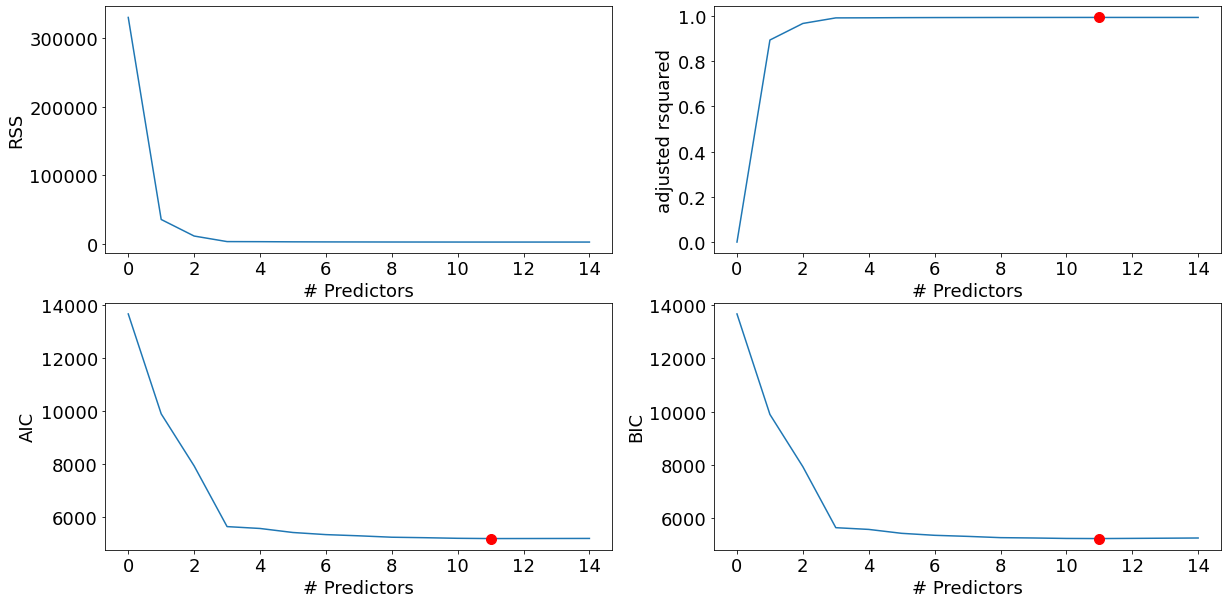

In [56]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a curve to show the relationship between the number of predictors and the RSS
plt.plot(models["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The idxmax() function can be used to identify the location of the maximum point of a vector
rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [57]:
print(getBest(6)['model'].summary()) #use function defined above to get best model results for any value of p

Processed  3003 models on 6 predictors in 9.426769018173218 seconds.
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.927e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:51:17   Log-Likelihood:                -2659.3
No. Observations:                1680   AIC:                             5333.
Df Residuals:                    1673   BIC:                             5371.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [58]:
print(getBest(2)['model'].summary()) #use function defined above to get best model results for any value of p

Processed  91 models on 2 predictors in 0.21740102767944336 seconds.
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.453e+04
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:51:18   Log-Likelihood:                -3957.1
No. Observations:                1680   AIC:                             7920.
Df Residuals:                    1677   BIC:                             7936.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Model Building

In [59]:
#preliminary model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split as tts

X, y = option.iloc[:, 1:].values, option.iloc[:,0]

X_train, X_test, y_train, y_test = tts(X, y, random_state = 1, test_size = .3)

lr_baseline = smf.ols('Value ~ S+K+tau+r', data = option).fit()

lr_baseline.rsquared_adj

0.9116528315475104

In [60]:
#new models

lr1 = smf.ols('Value ~ S+K+tau+r+K:tau', data = eng).fit()

lr1.rsquared_adj

0.9170319028465727

In [61]:
#new models

lr2 = smf.ols('Value ~ S+K+tau+r+NPV', data = eng).fit()

lr2.rsquared_adj

0.9116654910723726

In [62]:
mod_string = f'Value ~ S_K_quotient'
for i in filtered:
    if i != 'Value':
        if i != 'S_K_quotient':
            mod_string+= f'+ {i}'
mod_string

'Value ~ S_K_quotient+ S+ K+ tau+ r+ Potential+ NPV+ S_tau_quotient+ S_r_quotient+ S_Potential_quotient+ S_NPV_quotient+ K_S_quotient+ K_tau_quotient+ K_r_quotient'

In [63]:
lr3 = smf.ols(mod_string, data = high_corrs_df).fit()

lr3.rsquared_adj

0.9935360258310058

In [64]:
from sklearn.linear_model import LinearRegression

X, y = high_corrs_df.iloc[:, 1:].values, high_corrs_df.iloc[:,0]

X_train, X_test, y_train, y_test = tts(X, y, random_state = 1, test_size = .3)

lr_high_corrs = LinearRegression().fit(X_train, y_train)

lr_high_corrs.score(X_test, y_test)

0.9989568736417704

By dividing all columns by all other columns and taking the columns with high correlation to the value, we can create a linear regression model that performs really well despite its high variable count.

## Other Model Types

In [65]:
var_list = []
for var in high_corrs_df.columns:
    var_list.append(str(var))

In [66]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
#regresssion_model = RFR(n_estimators = 300, min_samples_leaf = 1)
regresssion_model = GBR(n_estimators = 500, max_depth = 4, min_samples_split = 4)
r2_model_1_cv = cross_val_score(regresssion_model, high_corrs_df.drop('Value', axis = 1), high_corrs_df['Value'], cv=kfolds_regresssion)
print("Linear Regression: \n")
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

Linear Regression: 

r squared of 10-folds: [0.99921634 0.99931506 0.99913752 0.99907984 0.99920846 0.99933204
 0.99934237 0.99883708 0.99917539 0.99920283] (mean r squared: 0.9991846917059212 )


Testing multiple trials with larger test set splits:

In [67]:
num_iter = 10
train_dict = {}
test_dict = {}
for m_depth in [1,2,3,4,5,6]:
    model = GBR(n_estimators = 600, max_depth = m_depth)
    for i in range(num_iter):
        X_train, X_test, y_train, y_test = tts(X, y, random_state = i, test_size = .3)
        model.fit(X_train, y_train)
        key = str(i+1)
        train_dict[key] = model.score(X_train, y_train)
        test_dict[key] = model.score(X_test, y_test)
    
    print(f'Max Depth: {m_depth}\nTraining R^2 mean: {pd.Series(list(train_dict.values())).mean()}\nTesting R^2 mean: {pd.Series(list(test_dict.values())).mean()}\n------')

Max Depth: 1
Training R^2 mean: 0.9983594760399495
Testing R^2 mean: 0.9971665725667792
------
Max Depth: 2
Training R^2 mean: 0.9997167028095036
Testing R^2 mean: 0.9987256831310976
------
Max Depth: 3
Training R^2 mean: 0.9999432350502376
Testing R^2 mean: 0.998957929923691
------
Max Depth: 4
Training R^2 mean: 0.999992154113583
Testing R^2 mean: 0.9990178432437528
------
Max Depth: 5
Training R^2 mean: 0.9999993051491346
Testing R^2 mean: 0.99898267357609
------
Max Depth: 6
Training R^2 mean: 0.9999999644065412
Testing R^2 mean: 0.9988510387362602
------


Best model is a gradient boosting regressor with n_trees = 600 and max_depth = 4

## Even More Models

In [74]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
#regresssion_model = RFR(n_estimators = 300, min_samples_leaf = 1)
regresssion_model = GBR(n_estimators = 600, max_depth = m_depth)
r2_model_1_cv = cross_val_score(regresssion_model, fares.drop('Value', axis = 1), fares['Value'], cv=kfolds_regresssion)
print("Linear Regression: \n")
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

Linear Regression: 

r squared of 10-folds: [0.99918532 0.9993578  0.9991977  0.99909578 0.99911231 0.99931607
 0.99940628 0.99880161 0.99927716 0.99887199] (mean r squared: 0.9991622005638223 )


In [75]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

num_iter = 10
train_dict = {}
test_dict = {}
model = GBR(n_estimators = 300, max_depth = 5)
X = fares.drop('Value', axis =1)
y = fares['Value']

for i in range(num_iter):
    X_train, X_test, y_train, y_test = tts(X, y, random_state = i, test_size = .3)
    model.fit(X_train, y_train)
    key = str(i+1)
    train_dict[key] = model.score(X_train, y_train)
    test_dict[key] = model.score(X_test, y_test)
    
print(f'Training R^2 mean: {pd.Series(list(train_dict.values())).mean()}\nTesting R^2 mean: {pd.Series(list(test_dict.values())).mean()}\n------')

Training R^2 mean: 0.9999805823694627
Testing R^2 mean: 0.9990656579911006
------


In [76]:
predictions = pd.Series(model.predict(X))

In [77]:
predictions.to_csv('predictions_from_regression.csv', index = False)

## Forward Selection for Final Model

In [78]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,gamma_call,vega_call,theta_call,rho_call,delta_put,theta_put,rho_put,gamma,norm_S,Value
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,0.000539,1.004909,-1.509238,0.418290,-0.482093,-1.383987,-1.000381,0.001200,1.027676,21.670404
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,0.000380,0.693646,-2.126542,0.243137,-0.528880,-1.981938,-0.527836,0.001103,0.918313,0.125000
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,0.000480,0.878988,-1.693990,0.349551,-0.481513,-1.565743,-0.744719,0.001212,1.030753,20.691244
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,0.000223,0.454053,-3.629756,0.115556,-0.504266,-3.493301,-0.175956,0.001097,0.981982,1.035002
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,0.000363,0.724084,-2.217948,0.257120,-0.461020,-2.097104,-0.422849,0.001207,1.089558,39.553020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,0.000469,0.926503,-1.732321,0.365008,-0.520226,-1.589398,-0.924828,0.001080,0.935573,1.470000
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,0.000498,0.957259,-1.625763,0.393006,-0.466759,-1.504999,-0.832469,0.001216,1.069400,34.927317
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,0.000383,0.701422,-2.102256,0.251168,-0.457694,-1.978599,-0.410698,0.001267,1.097544,41.127997
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,0.000491,0.946699,-1.649902,0.376291,-0.529117,-1.508957,-1.021026,0.001072,0.914753,0.440003


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.tree import DecisionTreeRegressor as DTR

In [82]:
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 6.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [91]:
high_corrs_df = high_corrs_df.iloc[:,:57]
X = high_corrs_df.drop('Value', axis  = 1)
y = high_corrs_df['Value']

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
model = GBR(n_estimators = 100)

sfs = SFS(model, k_features = 56, forward = True, verbose = 2, scoring = 'neg_mean_squared_error', cv = 0)
sfs.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    3.4s finished

[2021-11-30 14:07:24] Features: 1/56 -- score: -1.6031349736715896[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    5.1s finished

[2021-11-30 14:07:29] Features: 2/56 -- score: -0.16615420759900038[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.6s finished

[2021-11-30 14:07:36] Features: 3/56 -- score: -0.12339351649920757[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   21.1s finished

[2021-11-30 14:14:44] Features: 28/56 -- score: -0.09264836858131802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   19.4s finished

[2021-11-30 14:15:03] Features: 29/56 -- score: -0.09264836858131799[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   19.0s finished

[2021-11-30 14:15:22] Features: 30/56 -- score: -0.092704161712909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   18.2s finished

[2021-11-30 14:15:41] Features:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished

[2021-11-30 14:21:17] Features: 56/56 -- score: -0.10441084656419751

SequentialFeatureSelector(cv=0, estimator=GradientBoostingRegressor(),
                          k_features=56, scoring='neg_mean_squared_error',
                          verbose=2)

In [92]:
high_corrs_df

,Value,S,K,tau,r,Potential,NPV,S_K_quotient,S_tau_quotient,S_r_quotient,...,delta_call,gamma_call,vega_call,theta_call,rho_call,delta_put,theta_put,rho_put,gamma,norm_S
0,21.670404,431.623898,420,0.341270,0.03013,-3.966886,427.273364,1.027676,1264.758401,14325.386601,...,0.517907,0.000539,1.004909,-1.509238,0.418290,-0.482093,-1.383987,-1.000381,0.001200,1.027676
1,0.125000,427.015526,465,0.166667,0.03126,6.330746,424.830450,0.918313,2562.093150,13660.125589,...,0.471120,0.000380,0.693646,-2.126542,0.243137,-0.528880,-1.981938,-0.527836,0.001103,0.918313
2,20.691244,427.762336,415,0.265873,0.03116,-3.393161,424.286784,1.030753,1608.897145,13727.931207,...,0.518487,0.000480,0.878988,-1.693990,0.349551,-0.481513,-1.565743,-0.744719,0.001212,1.030753
3,1.035002,451.711658,460,0.063492,0.02972,0.526244,450.872486,0.981982,7114.458665,15198.911770,...,0.495734,0.000223,0.454053,-3.629756,0.115556,-0.504266,-3.493301,-0.175956,0.001097,0.981982
4,39.553020,446.718974,410,0.166667,0.02962,-6.119829,444.550979,1.089558,2680.313841,15081.666928,...,0.538980,0.000363,0.724084,-2.217948,0.257120,-0.461020,-2.097104,-0.422849,0.001207,1.089558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1.470000,444.397163,475,0.273810,0.03034,8.379348,440.775125,0.935573,1623.015726,14647.236767,...,0.479774,0.000469,0.926503,-1.732321,0.365008,-0.520226,-1.589398,-0.924828,0.001080,0.935573
1676,34.927317,438.453825,410,0.301587,0.02972,-8.581312,434.598206,1.069400,1453.820576,14752.820491,...,0.533241,0.000498,0.957259,-1.625763,0.393006,-0.466759,-1.504999,-0.832469,0.001216,1.069400
1677,41.127997,428.042219,390,0.170635,0.03188,-6.491331,425.756209,1.097544,2508.526487,13426.669354,...,0.542306,0.000383,0.701422,-2.102256,0.251168,-0.457694,-1.978599,-0.410698,0.001267,1.097544
1678,0.440003,439.081203,480,0.293651,0.02962,12.015837,435.333655,0.914753,1495.249499,14823.808325,...,0.470883,0.000491,0.946699,-1.649902,0.376291,-0.529117,-1.508957,-1.021026,0.001072,0.914753


In [93]:
y

0       21.670404
1        0.125000
2       20.691244
3        1.035002
4       39.553020
          ...    
1675     1.470000
1676    34.927317
1677    41.127997
1678     0.440003
1679     0.410002
Name: Value, Length: 1680, dtype: float64

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/faris/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


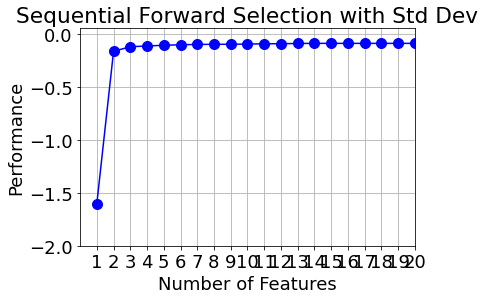

In [94]:
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(),
                kind = 'std_err', 
                figsize = (6,4))

plt.ylim([-2,.05])
plt.xlim(0,20)
plt.title('Sequential Forward Selection with Std Dev')
plt.grid()
plt.show()

In [96]:
vars_SBS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_SBS.iloc[12, :]

feature_idx      (0, 1, 3, 10, 18, 19, 26, 34, 36, 39, 44, 47, 48)
cv_scores                                    [-0.0924861973019007]
avg_score                                               -0.0924862
feature_names    (S, K, r, S_NPV_quotient, tau_r_quotient, tau_...
ci_bound                                                       NaN
std_dev                                                          0
std_err                                                        NaN
Name: 13, dtype: object

In [97]:
bestVars = list(vars_SBS.iloc[11, :]['feature_names'])

In [98]:
bestVars

['S',
 'r',
 'S_NPV_quotient',
 'tau_r_quotient',
 'tau_Potential_quotient',
 'Potential_S_quotient',
 'NPV_r_quotient',
 'Anthony Feature 1',
 'Anthony Feature 4',
 'f1',
 'gamma_call',
 'vega_call']

In [99]:
final = high_corrs_df[bestVars]

In [100]:
final['Value'] = high_corrs_df['Value']

<ipython-input-100-a93197aff0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Value'] = high_corrs_df['Value']


In [101]:
final

,S,r,S_NPV_quotient,tau_r_quotient,tau_Potential_quotient,Potential_S_quotient,NPV_r_quotient,Anthony Feature 1,Anthony Feature 4,f1,gamma_call,vega_call,Value
0,431.623898,0.03013,1.010182,11.326580,-0.086030,-0.009191,14180.994494,4.086408,0.353946,0.044901,0.000539,1.004909,21.670404
1,427.015526,0.03126,1.005143,5.331627,0.026327,0.014826,13590.225513,6.528645,2.301947,-0.072455,0.000380,0.693646,0.125000
2,427.762336,0.03116,1.008192,8.532510,-0.078356,-0.007932,13616.392290,3.498892,0.436351,0.046356,0.000480,0.878988,20.691244
3,451.711658,0.02972,1.001861,2.136341,0.120651,0.001165,15170.675851,0.541884,0.140131,-0.010694,0.000223,0.454053,1.035002
4,446.718974,0.02962,1.004877,5.626829,-0.027234,-0.013700,15008.473302,6.301098,4.438549,0.097865,0.000363,0.724084,39.553020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,444.397163,0.03034,1.008217,9.024704,0.032677,0.018856,14527.855139,8.633578,1.561426,-0.050720,0.000469,0.926503,1.470000
1676,438.453825,0.02972,1.008872,10.147621,-0.035145,-0.019572,14623.089043,8.836349,2.496928,0.083419,0.000498,0.957259,34.927317
1677,428.042219,0.03188,1.005369,5.352413,-0.026287,-0.015165,13354.962641,6.698275,5.137920,0.106244,0.000383,0.701422,41.127997
1678,439.081203,0.02962,1.008608,9.913936,0.024439,0.027366,14697.287461,12.371746,2.552839,-0.073051,0.000491,0.946699,0.440003


In [102]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import train_test_split as tts

num_iter = 20
train_dict = {}
test_dict = {}
model = GBR(n_estimators = 600, max_depth = 5)
X = final.drop('Value', axis =1)
y = final['Value']

for i in range(num_iter):
    X_train, X_test, y_train, y_test = tts(X, y, random_state = i, test_size = .1)
    model.fit(X_train, y_train)
    key = str(i+1)
    train_dict[key] = model.score(X_train, y_train)
    test_dict[key] = model.score(X_test, y_test)
    
print(f'Training R^2 mean: {pd.Series(list(train_dict.values())).mean()}\nTesting R^2 mean: {pd.Series(list(test_dict.values())).mean()}\n------')

Training R^2 mean: 0.9999972736320656
Testing R^2 mean: 0.9994431733814292
------


## Final Model

In [107]:
final_model = GBR(n_estimators = 600, max_depth = 5)

X = final.drop('Value', axis =1)
y = final['Value']

X_train, X_test, y_train, y_test = tts(X, y, random_state = 1, test_size = .05)
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.9994852839642977

In [108]:
from scipy.stats import norm
import pandas as pd
import numpy as np

eng = pd.read_csv('option_test_wolabel.csv')

eng['Potential'] = (eng['K'] - eng['S'])*eng['tau']
eng['NPV'] = eng['S'] / (1 + eng['r'])**(eng['tau'])

colList = eng.columns
for col1 in colList:
    for col2 in colList:
        if col1 != col2:
            eng[f'{col1}_{col2}_quotient'] = eng[col1]/eng[col2]
            
eng['Anthony Feature 1'] = abs(eng['S']-eng['K'])*eng['tau']*(1+eng['r'])
eng['Feature_3'] = np.log(eng['S']/eng['K'])*(eng['S']-eng['K'])
eng['Anthony Feature 4'] = (eng['S']/eng['K'])**4*eng['Feature_3']

eng['f1'] = np.log(eng['S']/eng['K'])+(eng['r']*eng['tau'])/np.sqrt(eng['tau'])
eng['gamma_call'] = norm.pdf(eng['f1'])/eng['S']*np.sqrt(eng['tau'])
eng['vega_call'] = 0.01*(eng['S']*norm.pdf(eng['f1']))*np.sqrt(eng['tau'])

In [109]:
bestVars = ['S',
 'r',
 'S_NPV_quotient',
 'tau_r_quotient',
 'tau_Potential_quotient',
 'Potential_S_quotient',
 'NPV_r_quotient',
 'Anthony Feature 1',
 'Anthony Feature 4',
 'f1',
 'gamma_call',
 'vega_call']

In [110]:
prediction_features = eng[bestVars]

In [111]:
predictions_final = pd.Series(final_model.predict(prediction_features))

In [112]:
predictions_final.to_csv('regression_predictions.csv')